In [0]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

image_dim=32

In [0]:
def parse_function(filenames):
    image_string=tf.read_file(filenames)
    image=tf.image.decode_png(image_string, channels=3)
    image=tf.image.convert_image_dtype(image ,tf.float32)
    
    resized_image=tf.image.resize_images(image,[image_dim,image_dim])
    return resized_image

def train_preprocess(image):
    image=tf.image.random_flip_left_right(image)
    image=tf.image.random_brightness(image , max_delta=32/255)
    image=tf.image.random_saturation(image ,lower=0.5,upper=1.5)
    
    image=tf.clip_by_value(image ,0.0,1.0)
    return image

In [0]:
def read_data(filenames):
    dataset = tf.data.Dataset.from_tensor_slices((filenames))
    dataset = dataset.map(parse_function)
    dataset = dataset.map(train_preprocess)
    
    
    iterator =dataset.make_one_shot_iterator()
    return iterator

In [0]:
def build_training(filenames):
    x=np.zeros((len(filenames),image_dim,image_dim,3))
    iterator=read_data(filenames)
    next_element=iterator.get_next()

    
    with tf.Session() as sess:
        for i in range(len(filenames)):
            image_example=sess.run(next_element)
            x[i,:,:] = image_example[:,:,:]
    
    return x

In [13]:
filenames=['zero_1.PNG','zero_2.PNG','zero_3.PNG','zero_4.PNG','zero_5.PNG','zero_6.PNG','zero_7.PNG','zero_8.PNG','zero_9.PNG','zero_10.PNG','one_1.PNG','one_2.PNG','one_3.PNG','one_4.PNG','one_5.PNG','one_6.PNG','one_7.PNG','one_8.PNG','one_9.PNG','one_10.PNG','two_1.PNG','two_2.PNG','two_3.PNG','two_4.PNG','two_5.PNG','two_6.PNG','two_7.PNG','two_8.PNG','two_9.PNG','two_10.PNG','three_1.PNG','three_2.PNG','three_3.PNG','three_4.PNG','three_5.PNG','three_6.PNG','three_7.PNG','three_8.PNG','three_9.PNG','three_10.PNG','four_1.PNG','four_2.PNG','four_3.PNG','four_4.PNG','four_5.PNG','four_6.PNG','four_7.PNG','four_8.PNG','four_9.PNG','four_10.PNG','five_1.PNG','five_2.PNG','five_3.PNG','five_4.PNG','five_5.PNG','five_6.PNG','five_7.PNG','five_8.PNG','five_9.PNG','five_10.PNG','six_1.PNG','six_2.PNG','six_3.PNG','six_4.PNG','six_5.PNG','six_6.PNG','six_7.PNG','six_8.PNG','six_9.PNG','six_10.PNG','seven_1.PNG','seven_2.PNG','seven_3.PNG','seven_4.PNG','seven_5.PNG','seven_6.PNG','seven_7.PNG','seven_8.PNG','seven_9.PNG','seven_10.PNG','eight_1.PNG','eight_2.PNG','eight_3.PNG','eight_4.PNG','eight_5.PNG','eight_6.PNG','eight_7.PNG','eight_8.PNG','eight_9.PNG','eight_10.PNG','nine_1.PNG','nine_2.PNG','nine_3.PNG','nine_4.PNG','nine_5.PNG','nine_6.PNG','nine_7.PNG','nine_8.PNG','nine_9.PNG','nine_10.PNG']

#number of classes
y = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9])
x = build_training(filenames)

#can write this like iris network
#make a network in tensorflow sequentially
#from Keras.optimizers import Adam
model=tf.keras.models.Sequential([
    
    #make one dimention matrix includes all images
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(image_dim*image_dim*3, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),#"take some neurons and drop other "selection
    #output layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    
    
])
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x,y,epochs=6000,batch_size=100)
model.summary()
model.evaluate(x,y)



Epoch 1/6000
100/100 [==============================] - 1s 6ms/step - loss: 2.5782 - acc: 0.1000
Epoch 2/6000
100/100 [==============================] - 0s 2ms/step - loss: 7.0923 - acc: 0.1000
Epoch 3/6000
100/100 [==============================] - 0s 2ms/step - loss: 9.0383 - acc: 0.1000
Epoch 4/6000
100/100 [==============================] - 0s 2ms/step - loss: 9.6333 - acc: 0.1000
Epoch 5/6000
100/100 [==============================] - 0s 2ms/step - loss: 9.6457 - acc: 0.1000
Epoch 6/6000
100/100 [==============================] - 0s 2ms/step - loss: 8.7705 - acc: 0.1000
Epoch 7/6000
100/100 [==============================] - 0s 2ms/step - loss: 10.0802 - acc: 0.1000
Epoch 8/6000
100/100 [==============================] - 0s 2ms/step - loss: 10.8254 - acc: 0.1000
Epoch 9/6000
100/100 [==============================] - 0s 2ms/step - loss: 9.2429 - acc: 0.1000
Epoch 10/6000
100/100 [==============================] - 0s 2ms/step - loss: 8.6348 - acc: 0.1000
Epoch 11/6000
100/100 [====

[0.05113228138536215, 1.0]

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


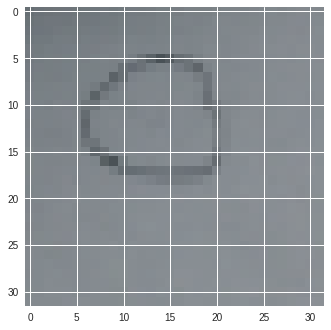

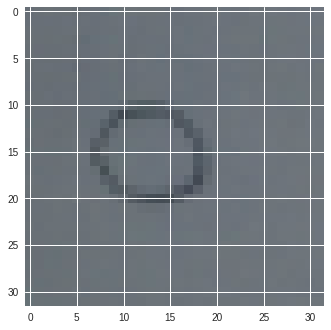

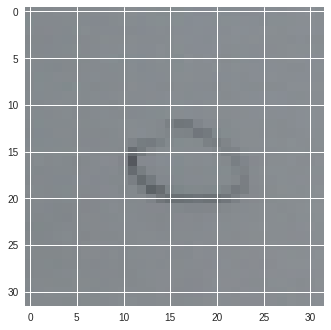

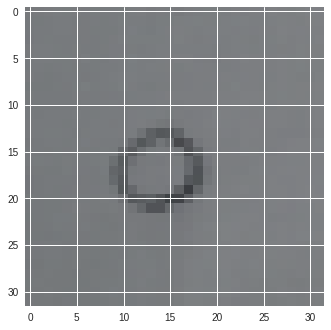

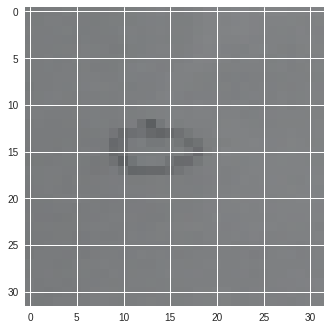

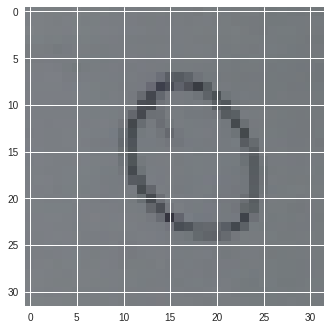

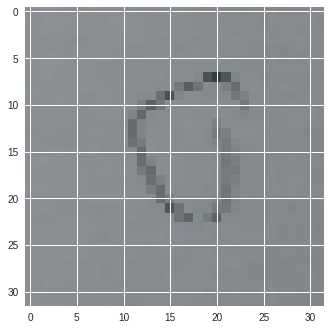

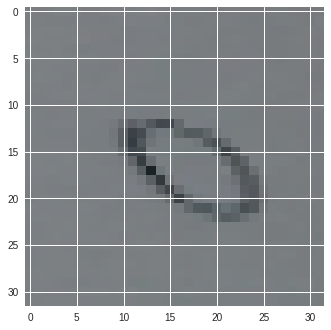

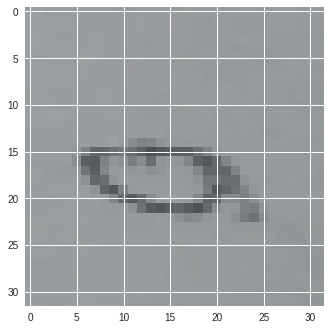

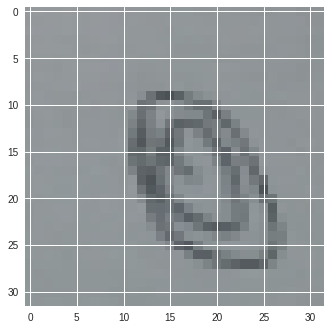

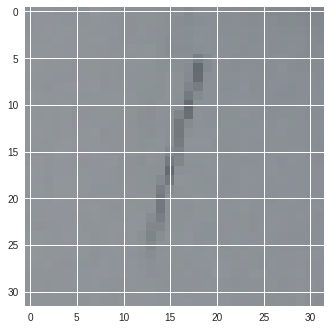

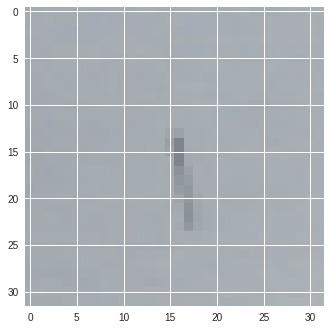

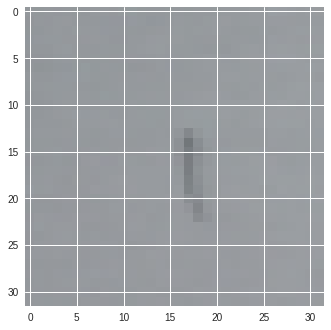

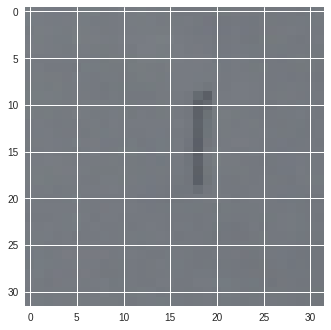

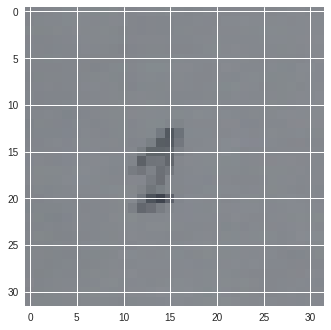

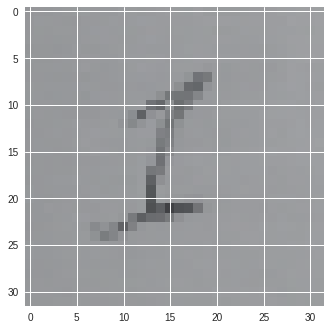

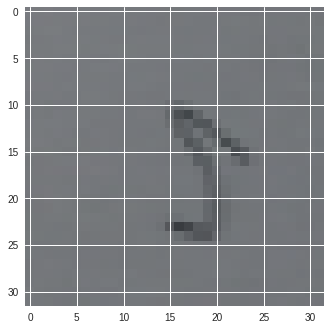

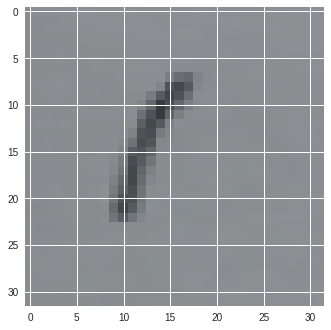

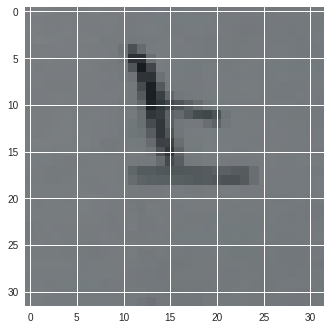

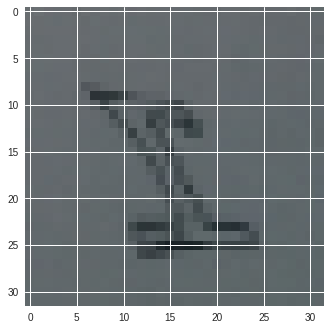

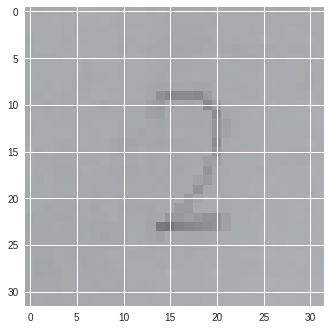

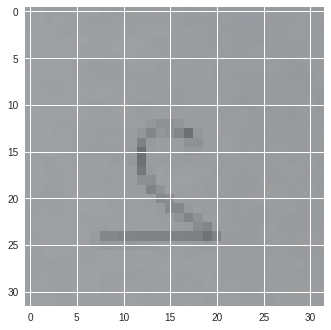

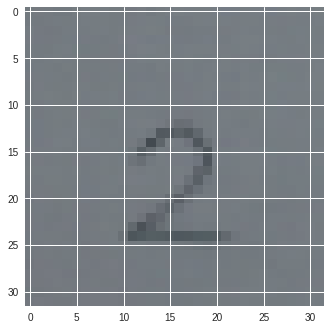

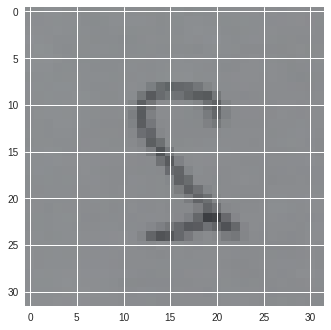

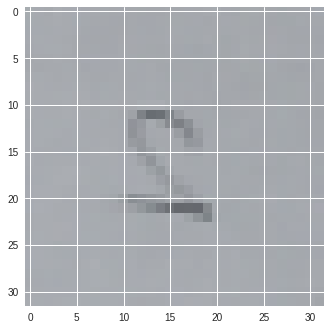

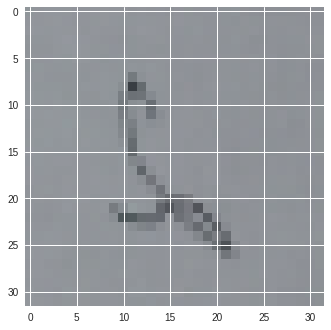

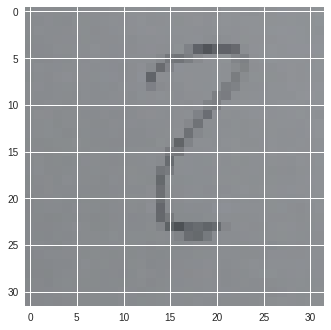

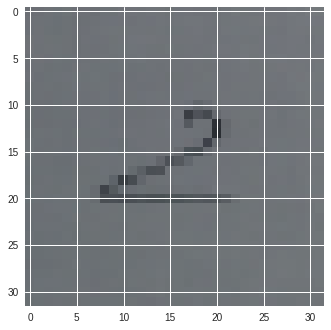

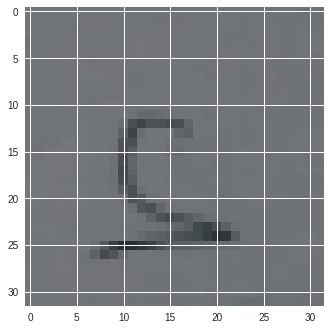

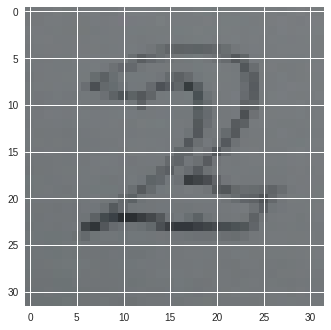

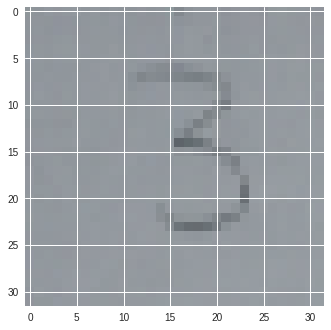

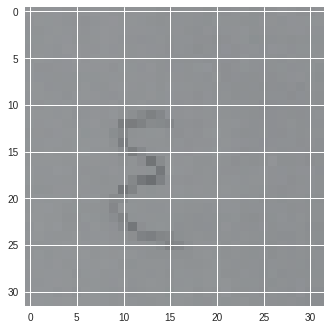

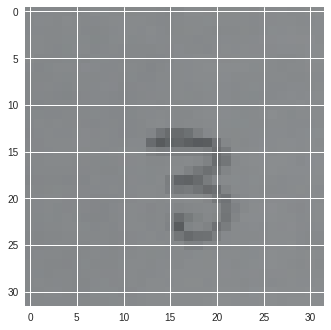

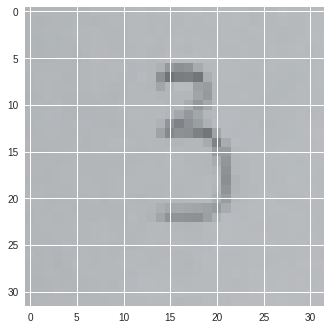

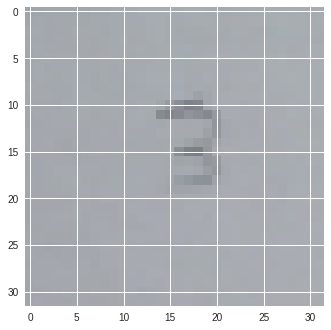

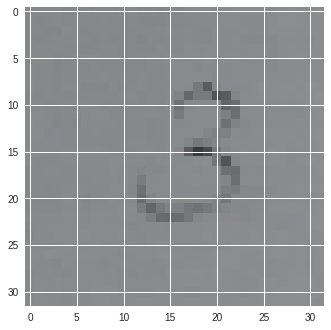

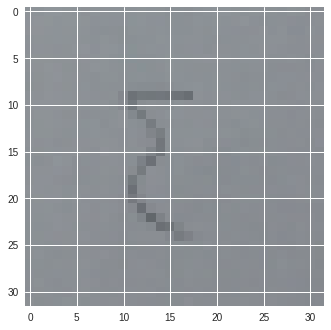

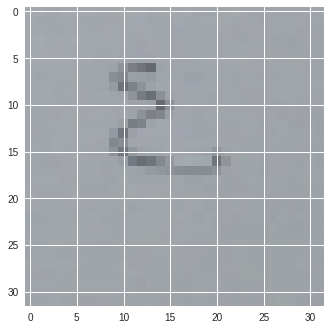

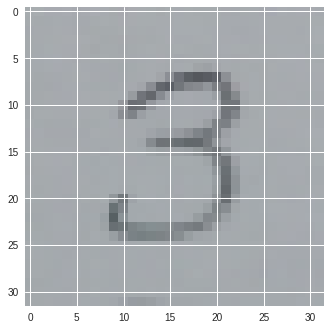

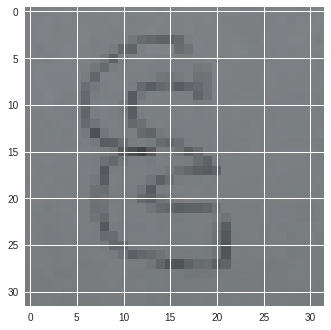

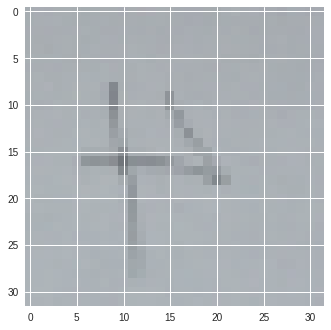

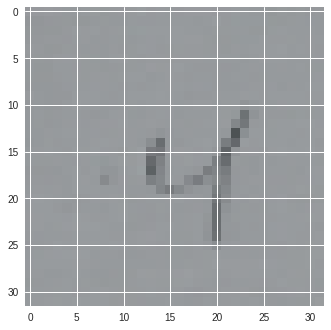

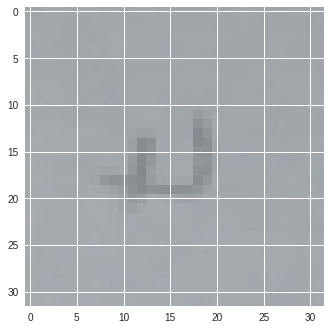

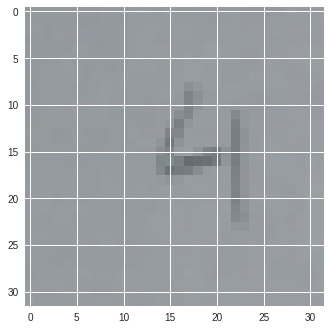

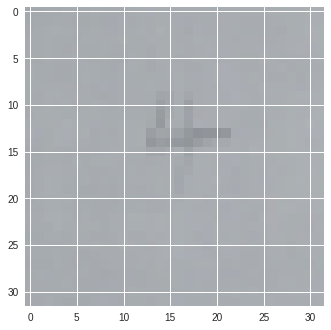

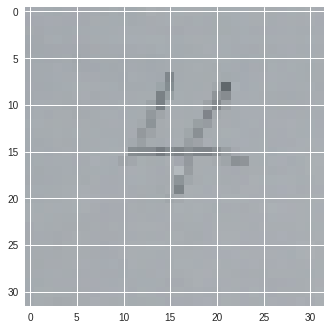

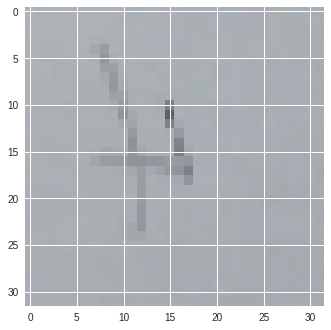

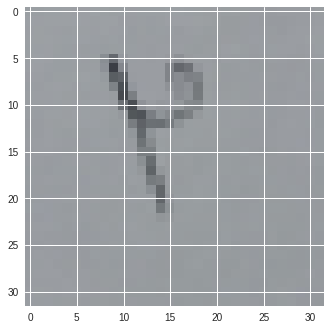

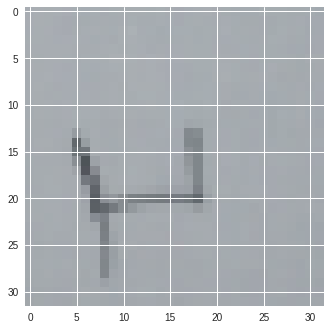

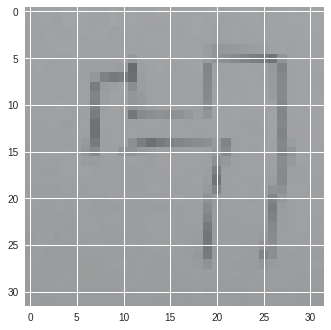

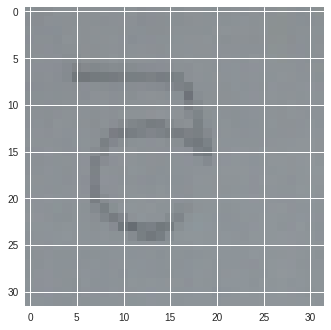

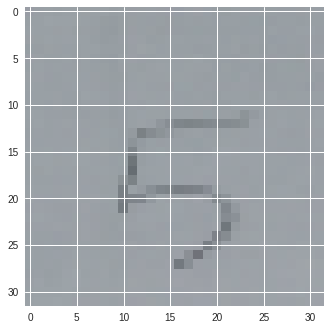

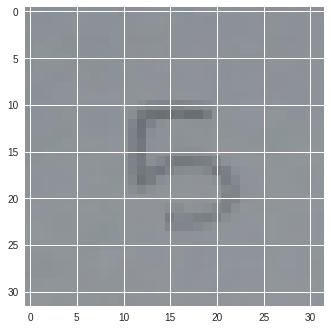

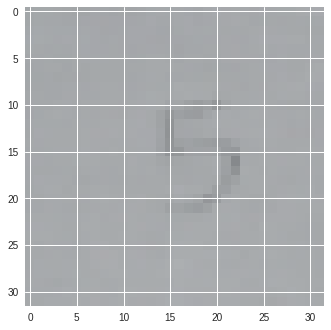

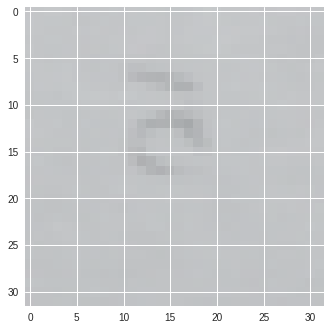

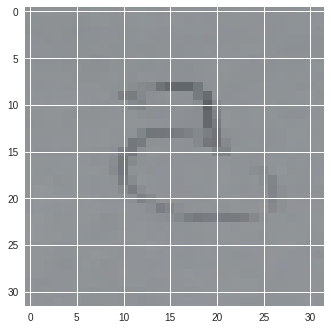

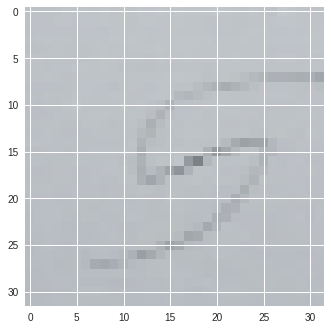

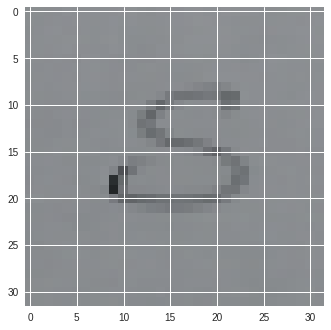

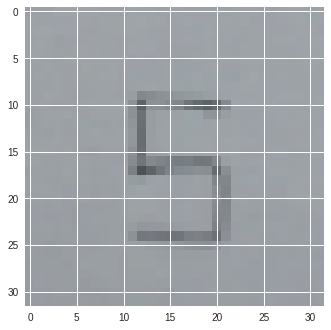

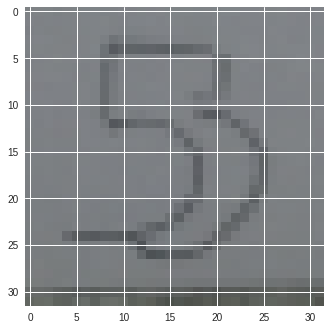

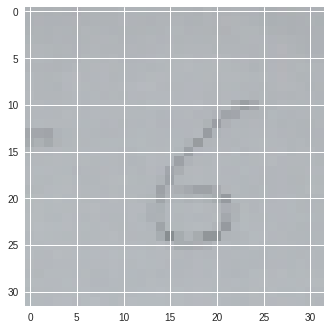

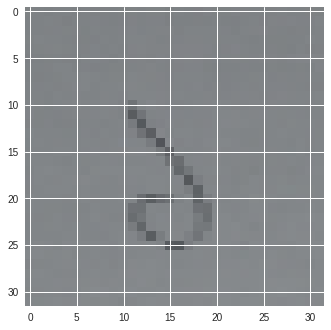

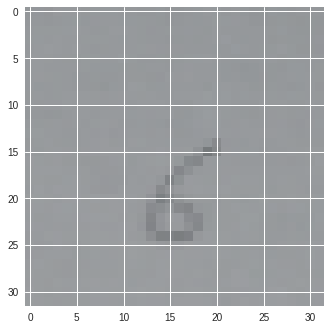

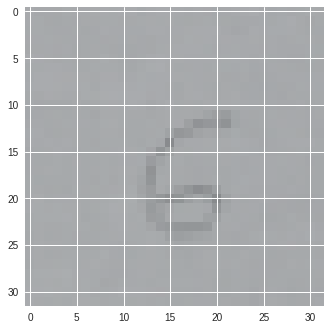

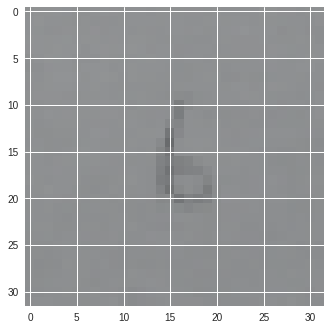

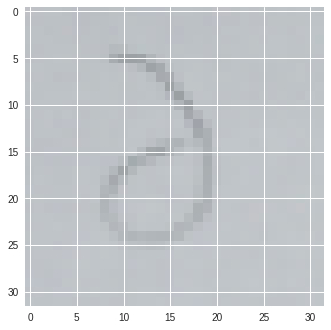

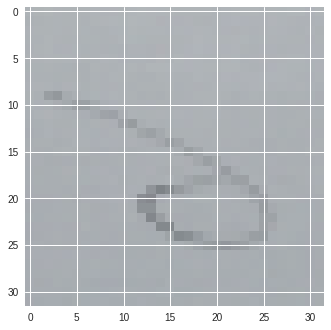

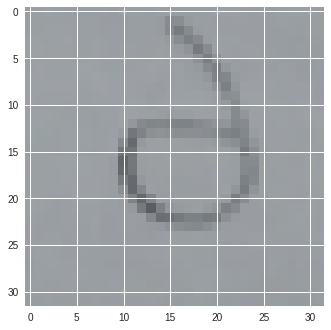

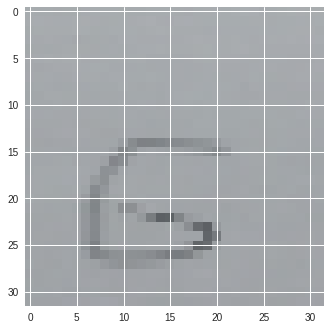

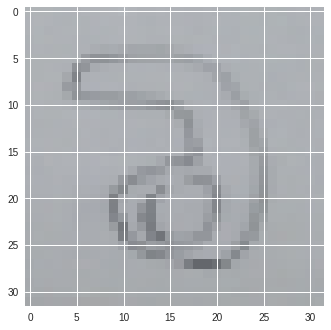

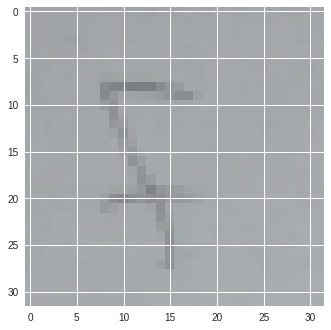

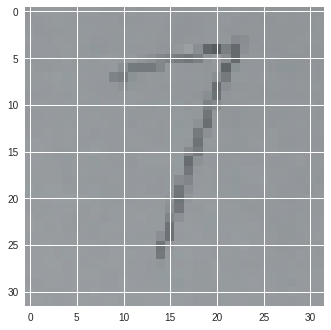

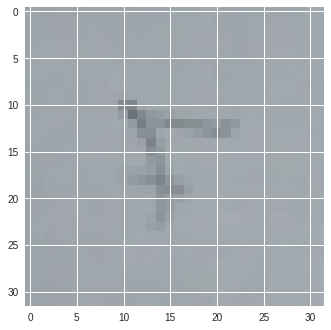

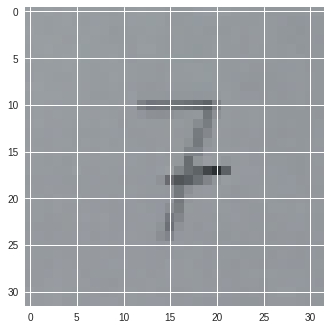

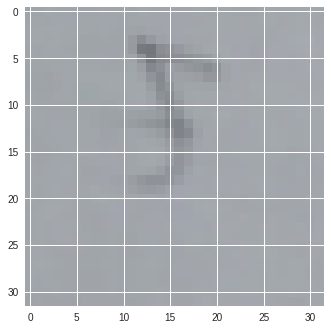

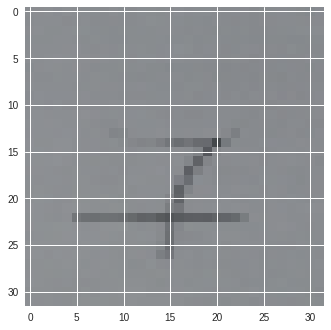

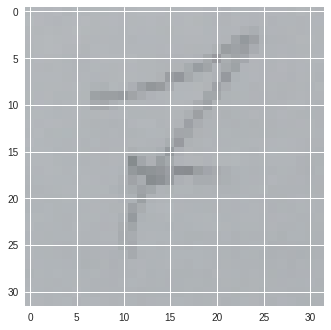

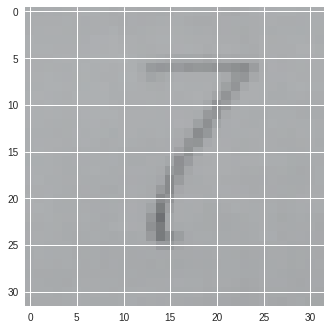

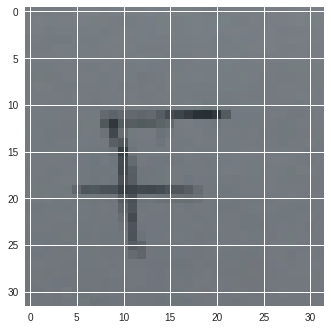

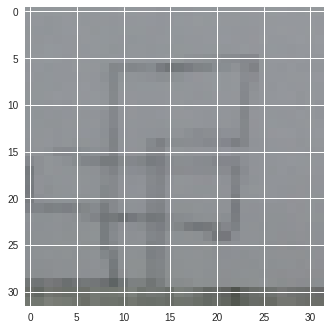

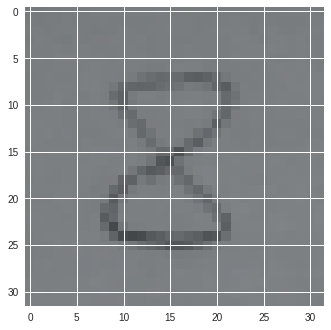

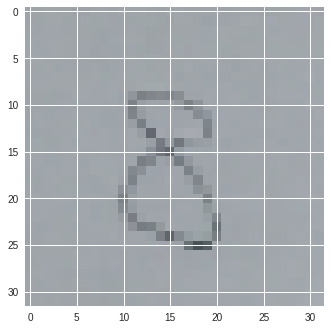

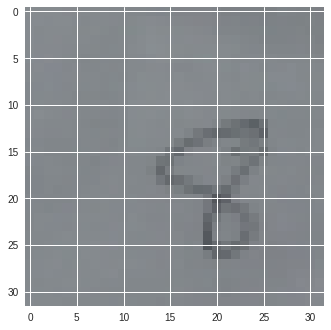

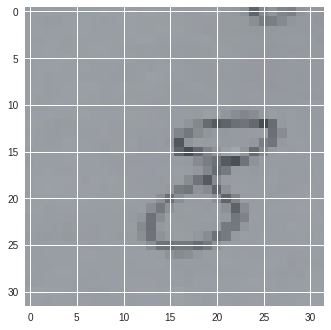

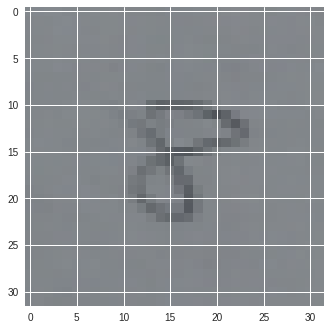

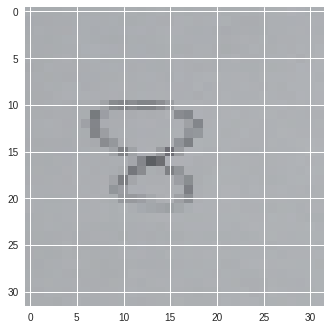

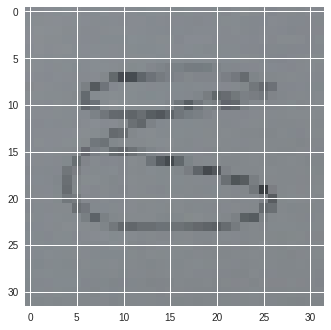

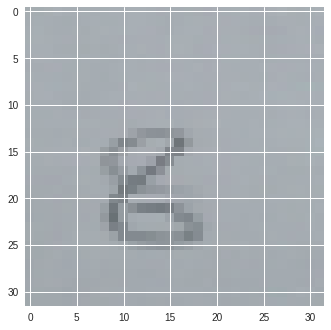

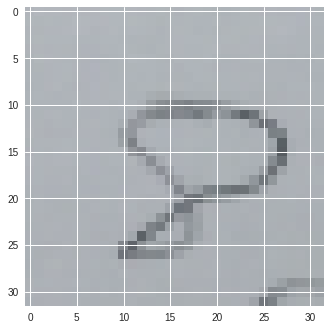

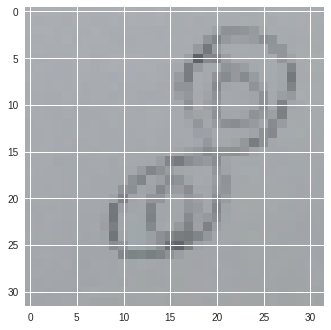

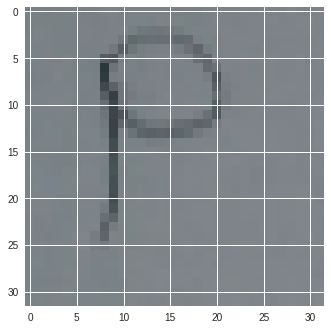

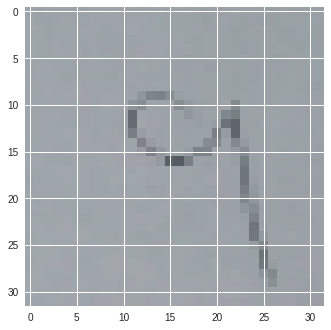

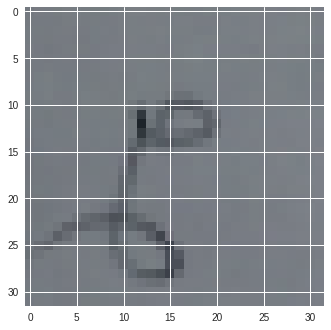

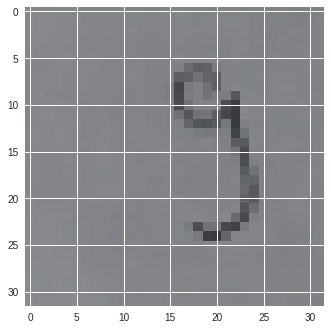

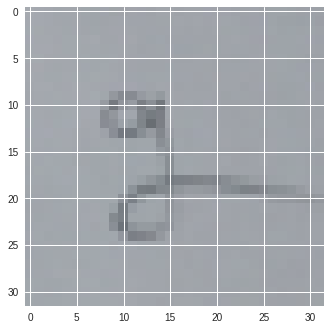

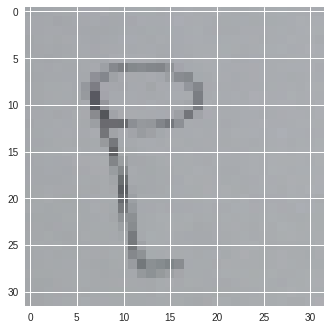

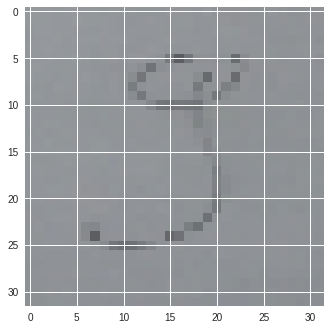

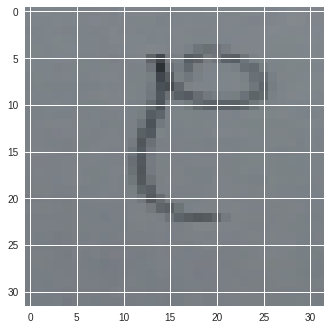

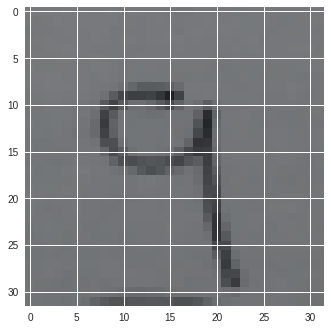

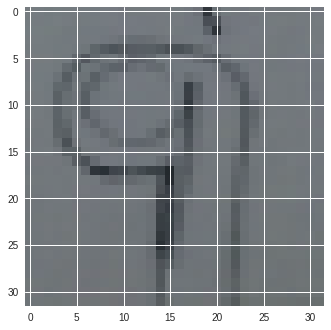

In [14]:
filenames=['zero_1.PNG','zero_2.PNG','zero_3.PNG','zero_4.PNG','zero_5.PNG','zero_6.PNG','zero_7.PNG','zero_8.PNG','zero_9.PNG','zero_10.PNG','one_1.PNG','one_2.PNG','one_3.PNG','one_4.PNG','one_5.PNG','one_6.PNG','one_7.PNG','one_8.PNG','one_9.PNG','one_10.PNG','two_1.PNG','two_2.PNG','two_3.PNG','two_4.PNG','two_5.PNG','two_6.PNG','two_7.PNG','two_8.PNG','two_9.PNG','two_10.PNG','three_1.PNG','three_2.PNG','three_3.PNG','three_4.PNG','three_5.PNG','three_6.PNG','three_7.PNG','three_8.PNG','three_9.PNG','three_10.PNG','four_1.PNG','four_2.PNG','four_3.PNG','four_4.PNG','four_5.PNG','four_6.PNG','four_7.PNG','four_8.PNG','four_9.PNG','four_10.PNG','five_1.PNG','five_2.PNG','five_3.PNG','five_4.PNG','five_5.PNG','five_6.PNG','five_7.PNG','five_8.PNG','five_9.PNG','five_10.PNG','six_1.PNG','six_2.PNG','six_3.PNG','six_4.PNG','six_5.PNG','six_6.PNG','six_7.PNG','six_8.PNG','six_9.PNG','six_10.PNG','seven_1.PNG','seven_2.PNG','seven_3.PNG','seven_4.PNG','seven_5.PNG','seven_6.PNG','seven_7.PNG','seven_8.PNG','seven_9.PNG','seven_10.PNG','eight_1.PNG','eight_2.PNG','eight_3.PNG','eight_4.PNG','eight_5.PNG','eight_6.PNG','eight_7.PNG','eight_8.PNG','eight_9.PNG','eight_10.PNG','nine_1.PNG','nine_2.PNG','nine_3.PNG','nine_4.PNG','nine_5.PNG','nine_6.PNG','nine_7.PNG','nine_8.PNG','nine_9.PNG','nine_10.PNG']
Y=np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9])
X=build_training(filenames)


for i in range(100):
    plt.figure()
    plt.imshow(X[i,:,:,:])